In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
# Assuming your datasets are in CSV format
driver_df = pd.read_csv('driver.csv')
driver_standings_df = pd.read_csv('drivers_standings.csv')
# Add more datasets as needed

In [34]:
# Merge driver_df with driver_standings_df
merged_df = pd.merge(driver_df, driver_standings_df, on='driverId', how='inner')
# Add more merge operations as needed


In [35]:
print(driver_df.head())

   driverId   driverRef  forename     surname       dob nationality  \
0         1    hamilton     Lewis    Hamilton    1/7/85     British   
1         2    heidfeld      Nick    Heidfeld   5/10/77      German   
2         3     rosberg      Nico     Rosberg   6/27/85      German   
3         4      alonso  Fernando      Alonso   7/29/81     Spanish   
4         5  kovalainen    Heikki  Kovalainen  10/19/81     Finnish   

                                              url  
0     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2       http://en.wikipedia.org/wiki/Nico_Rosberg  
3    http://en.wikipedia.org/wiki/Fernando_Alonso  
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen  


In [36]:
print(driver_standings_df.head())

   driverStandingsId  raceId  driverId  points  position  wins
0                  1      18         1    10.0         1     1
1                  2      18         2     8.0         2     0
2                  3      18         3     6.0         3     0
3                  4      18         4     5.0         4     0
4                  5      18         5     4.0         5     0


In [37]:
# Merge driver_df with driver_standings_df
merged_df = pd.merge(driver_df, driver_standings_df, on='driverId', how='inner')
# Add more merge operations as needed


In [38]:
print(merged_df.head())


   driverId driverRef forename   surname     dob nationality  \
0         1  hamilton    Lewis  Hamilton  1/7/85     British   
1         1  hamilton    Lewis  Hamilton  1/7/85     British   
2         1  hamilton    Lewis  Hamilton  1/7/85     British   
3         1  hamilton    Lewis  Hamilton  1/7/85     British   
4         1  hamilton    Lewis  Hamilton  1/7/85     British   

                                           url  driverStandingsId  raceId  \
0  http://en.wikipedia.org/wiki/Lewis_Hamilton                  1      18   
1  http://en.wikipedia.org/wiki/Lewis_Hamilton                  9      19   
2  http://en.wikipedia.org/wiki/Lewis_Hamilton                 27      20   
3  http://en.wikipedia.org/wiki/Lewis_Hamilton                 48      21   
4  http://en.wikipedia.org/wiki/Lewis_Hamilton                 69      22   

   points  position  wins  
0    10.0         1     1  
1    14.0         1     1  
2    14.0         3     1  
3    20.0         2     1  
4    28.0   

In [39]:
grouped_by_driver = merged_df.groupby('driverId')


In [40]:
# For example, to get information about driver with driverId 1
driver_1_info = grouped_by_driver.get_group(1)
print(driver_1_info)


     driverId driverRef forename   surname     dob nationality  \
0           1  hamilton    Lewis  Hamilton  1/7/85     British   
1           1  hamilton    Lewis  Hamilton  1/7/85     British   
2           1  hamilton    Lewis  Hamilton  1/7/85     British   
3           1  hamilton    Lewis  Hamilton  1/7/85     British   
4           1  hamilton    Lewis  Hamilton  1/7/85     British   
..        ...       ...      ...       ...     ...         ...   
322         1  hamilton    Lewis  Hamilton  1/7/85     British   
323         1  hamilton    Lewis  Hamilton  1/7/85     British   
324         1  hamilton    Lewis  Hamilton  1/7/85     British   
325         1  hamilton    Lewis  Hamilton  1/7/85     British   
326         1  hamilton    Lewis  Hamilton  1/7/85     British   

                                             url  driverStandingsId  raceId  \
0    http://en.wikipedia.org/wiki/Lewis_Hamilton                  1      18   
1    http://en.wikipedia.org/wiki/Lewis_Hamilton 

In [41]:
# Display summary statistics for numerical columns
print(merged_df.describe())


           driverId  driverStandingsId        raceId        points  \
count  34234.000000       34234.000000  34234.000000  34234.000000   
mean     308.750453       42631.217211    574.385640     13.686666   
std      268.393298       21759.863200    285.341336     36.115432   
min        1.000000           1.000000      1.000000      0.000000   
25%       87.000000       19677.250000    348.250000      0.000000   
50%      221.000000       49729.500000    597.000000      1.000000   
75%      510.000000       59028.750000    798.000000     10.000000   
max      859.000000       72363.000000   1115.000000    454.000000   

           position          wins  
count  34234.000000  34234.000000  
mean      19.870188      0.270754  
std       16.380498      1.005250  
min        1.000000      0.000000  
25%        8.000000      0.000000  
50%       16.000000      0.000000  
75%       26.000000      0.000000  
max      108.000000     15.000000  


In [42]:
# Check for missing values
print(merged_df.isnull().sum())


driverId             0
driverRef            0
forename             0
surname              0
dob                  0
nationality          0
url                  0
driverStandingsId    0
raceId               0
points               0
position             0
wins                 0
dtype: int64


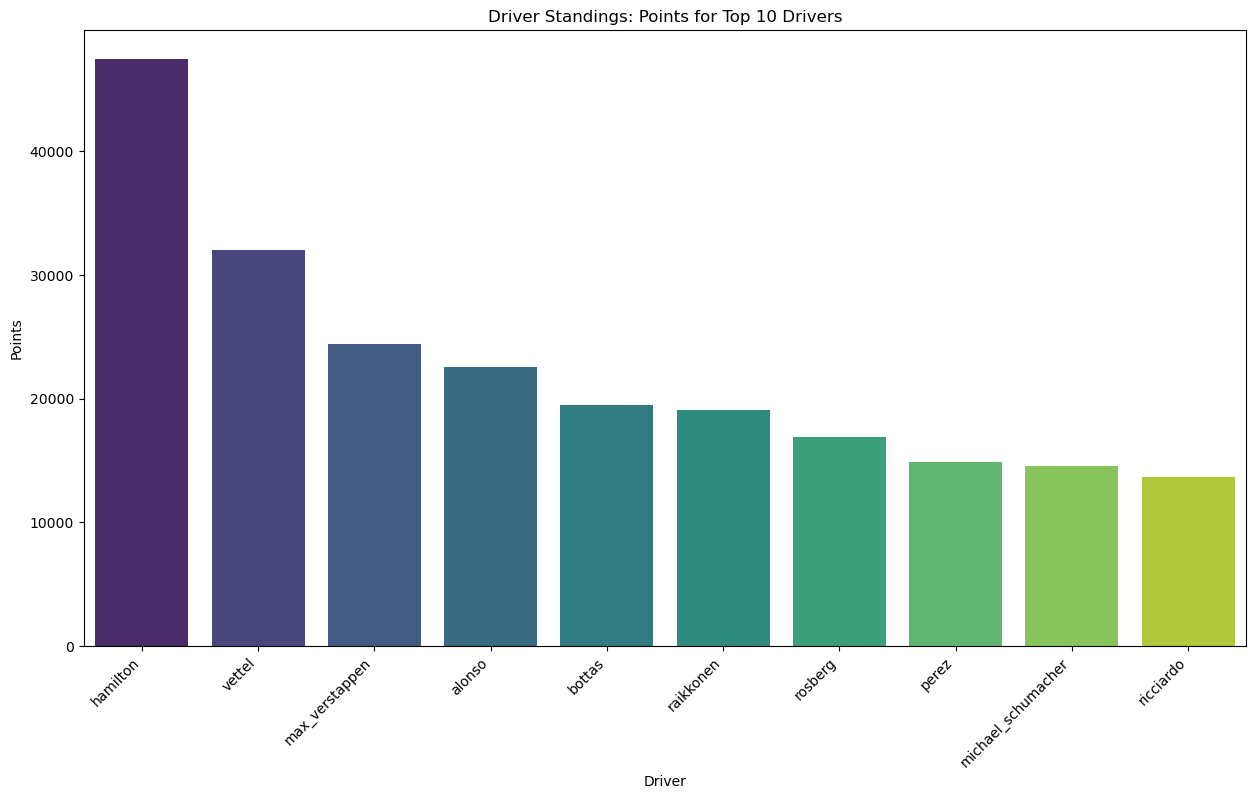

In [31]:

# Group by driver and calculate the sum of points and wins for each driver
driver_standings = merged_df.groupby('driverRef').agg({'points': 'sum', 'wins': 'sum'}).reset_index()

# Sort the DataFrame by points in descending order
driver_standings = driver_standings.sort_values(by='points', ascending=False)

# Select the top 10 drivers
top_10_drivers = driver_standings.head(10)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='driverRef', y='points', data=top_10_drivers, palette='viridis')
plt.title('Driver Standings: Points for Top 10 Drivers')
plt.xlabel('Driver')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()
